In [15]:
import cslib

In [16]:
df = cslib.fetch_data('../cs-train/')

In [17]:
df

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13599.0,28,489547,11,0.85,20719,10,2017,2017-11-28
1,United Kingdom,15998.0,28,489522,11,1.25,21826,3,2017,2017-11-28
2,United Kingdom,15998.0,28,489522,11,1.25,21827,3,2017,2017-11-28
3,United Kingdom,15998.0,28,489522,11,1.25,21828,3,2017,2017-11-28
4,United Kingdom,15998.0,28,489522,11,1.25,16225,4,2017,2017-11-28
...,...,...,...,...,...,...,...,...,...,...
815006,United Kingdom,17656.0,31,562145,7,8.95,82486,2,2019,2019-07-31
815007,United Kingdom,17656.0,31,562145,7,7.95,22690,2,2019,2019-07-31
815008,United Kingdom,17656.0,31,562145,7,6.75,21115,4,2019,2019-07-31
815009,United Kingdom,14401.0,31,562156,7,3.75,37495,4,2019,2019-07-31


In [29]:
df.describe()

,customer_id,day,month,price,times_viewed,year,revenue
count,625249.000000,815011.000000,815011.000000,815011.000000,815011.000000,815011.000000,815011.000000
mean,15333.415068,15.064819,6.592718,4.802631,5.231106,2018.247654,14.291172
std,1698.360788,8.788845,3.598781,135.058707,5.109982,0.545261,197.463439
min,12346.000000,1.000000,1.000000,-53594.360000,0.000000,2017.000000,-53594.360000
25%,13956.000000,7.000000,3.000000,1.250000,1.000000,2018.000000,3.360000
50%,15279.000000,15.000000,6.000000,2.100000,3.000000,2018.000000,8.290000
75%,16813.000000,23.000000,10.000000,4.210000,8.000000,2019.000000,16.130000
max,18287.000000,31.000000,12.000000,38970.000000,24.000000,2019.000000,50222.180000


In [32]:
# data has a negative price value. This could be an error in the data.
df.price.min()
df[df[price]<0][price]=0

-53594.36

In [18]:
# total number of days in the data
df['invoice_date'].describe()['last']-df['invoice_date'].describe()['first']

Timedelta('610 days 00:00:00')

In [19]:
# calculate revenue
df['revenue'] = df['price']*df['times_viewed']

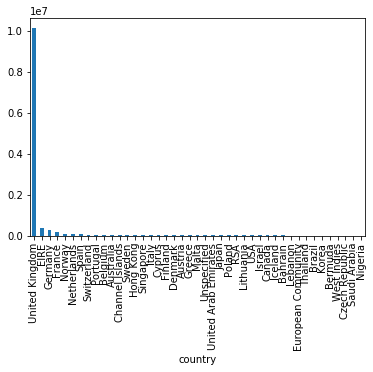

In [25]:
# countries with high revenues
df.groupby('country').sum()['revenue'].sort_values(ascending=False).plot(kind='bar')

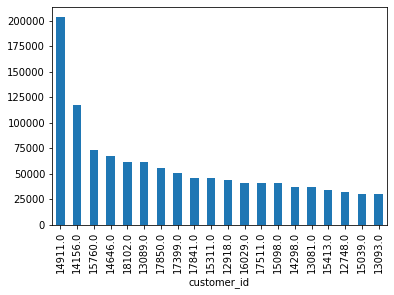

In [28]:
# customers who generate high revenue
df.groupby('customer_id').sum()['revenue'].sort_values(ascending=False).head(20).plot(kind='bar')

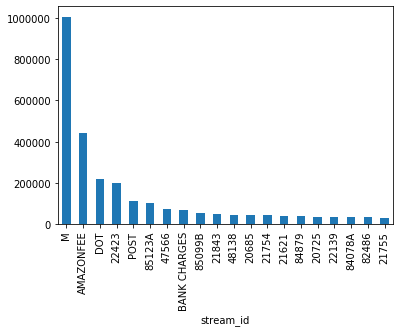

In [30]:
# streams that generate high revenue
df.groupby('stream_id').sum()['revenue'].sort_values(ascending=False).head(20).plot(kind='bar')

In [20]:
ts = cslib.convert_to_ts(df)
ts

,date,purchases,unique_invoices,unique_streams,total_views,year_month,revenue
0,2017-11-01,0,0,0,0,2017-11,0.00
1,2017-11-02,0,0,0,0,2017-11,0.00
2,2017-11-03,0,0,0,0,2017-11,0.00
3,2017-11-04,0,0,0,0,2017-11,0.00
4,2017-11-05,0,0,0,0,2017-11,0.00
...,...,...,...,...,...,...,...
602,2019-06-26,1358,67,999,6420,2019-06,4903.17
603,2019-06-27,1620,80,944,9435,2019-06,5499.38
604,2019-06-28,1027,70,607,5539,2019-06,3570.60
605,2019-06-29,0,0,0,0,2019-06,0.00


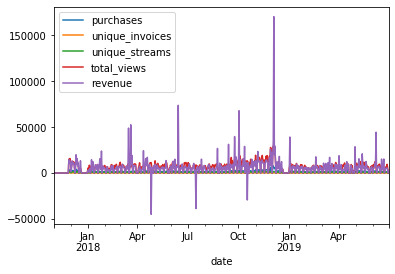

In [11]:
# activity during different months
ts.set_index('date').plot()